In [1]:
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

## Import the Data files


In [2]:
##GG web site data
bronze_df = pd.read_csv("gg_datafiles/bronze.csv", encoding="utf-8")
gold_df = pd.read_csv("gg_datafiles/gold.csv", encoding="utf-8")
platinum_df = pd.read_csv("gg_datafiles/platinum.csv", encoding="utf-8")
platinumplus_df = pd.read_csv("gg_datafiles/platinumplus.csv", encoding="utf-8")
silver_df = pd.read_csv("gg_datafiles/silver.csv", encoding="utf-8")
####Time course data
TC_data_columns_df = pd.read_csv("Timecourse_Datafiles/_columns.csv", encoding="utf-8")
TC_data_bans_df = pd.read_csv("Timecourse_Datafiles/bans.csv", encoding="utf-8")
TC_data_kills_df = pd.read_csv("Timecourse_Datafiles/kills.csv", encoding="utf-8")
TC_data_LeagueofLegends_df = pd.read_csv("Timecourse_Datafiles/LeagueofLegends.csv", encoding="utf-8")
TC_data_matchinfo_df = pd.read_csv("Timecourse_Datafiles/matchinfo.csv", encoding="utf-8")
TC_data_structures_df = pd.read_csv("Timecourse_Datafiles/structures.csv", encoding="utf-8")
#####2018-2020
champions_df = pd.read_csv("2018_2020_data/champion.csv", encoding="utf-8")
players_df = pd.read_csv("2018_2020_data/players.csv", encoding="utf-8")
teams_df = pd.read_csv("2018_2020_data/teams.csv", encoding="utf-8")


## Set up the data to be analyzed

In [3]:
#Create a new column to specify the league for stacking the dataset
bronze_df["League"] = "Bronze"
gold_df["League"] = "Gold"
platinum_df["League"] = "Platinum"
platinumplus_df["League"] = "Platinum Plus"
silver_df["League"] = "Silver"

#Create stacked combined dataset
stack_df = pd.concat([bronze_df, 
                      gold_df, 
                      platinum_df, 
                      platinumplus_df,
                      silver_df], axis = 0)

In [4]:
stack_df.loc[stack_df.Role == "Middle"][["Kills","Deaths","Assists","Minions Killed"]]


,Kills,Deaths,Assists,Minions Killed
1,6.82,5.69,7.73,140.2
2,8.45,6.61,5.48,133.9
6,5.94,4.96,7.49,158.3
8,7.91,6.49,7.80,139.4
12,5.70,5.95,8.82,132.2
...,...,...,...,...
173,6.75,5.02,8.59,162.2
177,7.27,7.02,5.74,176.2
181,9.09,6.41,5.59,158.1
182,5.58,5.55,7.71,170.2


In [5]:
Jim_group = stack_df.loc[stack_df.Role == "Middle"].groupby("Champion")[["Kills","Deaths","Assists","Minions Killed"]].mean()
Jim_group.head()

,Kills,Deaths,Assists,Minions Killed
Champion,,,,
Ahri,6.6500,5.490,7.6720,153.360
Akali,8.1620,6.326,5.3820,144.940
Anivia,5.8300,4.665,7.5025,170.500
Annie,7.6000,6.200,7.6060,150.940
Aurelion Sol,5.7125,5.590,8.6950,145.425


#  Mid Role Analysis

### - High kills (G)
### - Low deaths (G)
### - High assist (G)
### - High minions kills (G)



In [6]:
kills_df = Jim_group.sort_values("Kills",ascending=False)[["Kills"]].head(10)
kills_df

,Kills
Champion,
Katarina,9.466
Zed,9.216
Fizz,8.842
Talon,8.828
Nocturne,8.405
Qiyana,8.356
Akali,8.162
Kassadin,8.070
Irelia,7.918


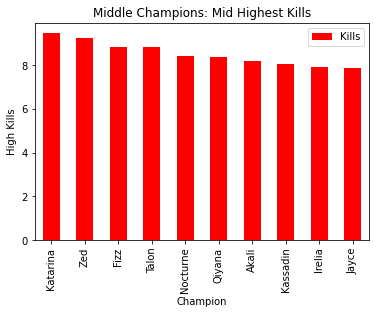

In [7]:
kills_graph = kills_df.plot(kind="bar", color="red")
kills_graph.set_ylabel("High Kills")

plt.title("Middle Champions: Mid Highest Kills")
#plt.grid()
plt.show()

In [8]:
low_deaths_df = Jim_group.sort_values("Deaths")[["Deaths"]].head(10)
low_deaths_df

,Deaths
Champion,
Zilean,4.420
Anivia,4.665
Xerath,5.044
LeBlanc,5.188
Lux,5.314
Orianna,5.406
Galio,5.440
Ahri,5.490
Malzahar,5.548


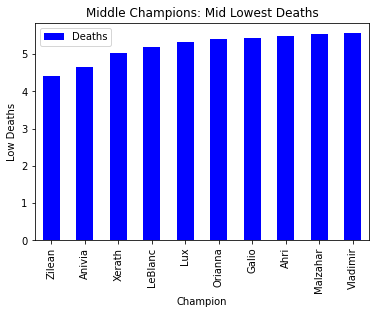

In [10]:
low_deaths_graph = low_deaths_df.plot(kind="bar",color="blue")
low_deaths_graph.set_ylabel("Low Deaths")
plt.title("Middle Champions: Mid Lowest Deaths")
#plt.grid()
plt.show()

In [10]:
high_assists_df = Jim_group.sort_values("Assists",ascending=False)[["Assists"]].head(10)
high_assists_df

,Assists
Champion,
Zilean,10.780000
Nunu & Willump,10.506667
Galio,9.942000
Orianna,9.336000
Lux,9.242000
Lissandra,8.892000
Karthus,8.873333
Aurelion Sol,8.695000
Xerath,8.652000


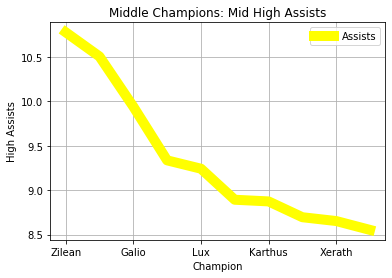

In [11]:
high_assists_graph = high_assists_df.plot(color="yellow",linewidth=10)
high_assists_graph.set_ylabel("High Assists")
plt.title("Middle Champions: Mid High Assists")
plt.grid()
plt.show()

In [12]:
high_minion_killed_df = Jim_group.sort_values("Minions Killed",ascending=False)[["Minions Killed"]].head(10)
high_minion_killed_df

,Minions Killed
Champion,
Irelia,190.30
Malzahar,183.88
Kog'Maw,182.60
Ryze,182.28
Corki,178.64
Yasuo,178.44
Vladimir,177.94
Viktor,176.72
Karthus,176.60


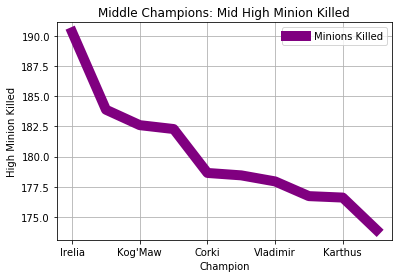

In [13]:
high_minion_killed_graph = high_minion_killed_df.plot(color="purple",linewidth=10)
high_minion_killed_graph.set_ylabel("High Minion Killed")
plt.title("Middle Champions: Mid High Minion Killed")
plt.grid()
plt.show()

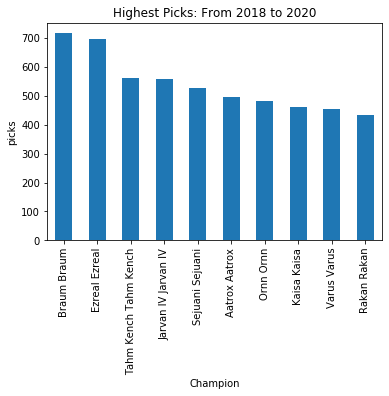

In [14]:
reduced_champions_df = champions_df.groupby(["Champion"]).mean()

#reduced_champions_df.head()
new = reduced_champions_df.sort_values(["picks"],ascending=False)["picks"]
healing_graph = new.head(10).plot(kind="bar")
healing_graph.set_ylabel("picks")
plt.title("Highest Picks: From 2018 to 2020")
plt.show()

#new = reduced_champions_df["picks"]
#new.sort_values
#print(gg_data_bronze_df.columns.head())
#print(gg_data_gold_df.columns)
#print(TC_data_kills_df.head())
#TC_data_LeagueofLegends_df.head()